In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display
plt.rc('font', family='Verdana')

import warnings
warnings.filterwarnings('ignore')

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def set_columns_type(function):
    
    def wrapper(self, *args, **kwargs):
        function(self, *args, **kwargs)
        for column in self.categorical_columns:
            if column in self.columns:
                self[column]=self[column].astype('str')
                
    return wrapper


def columns_types(function):

    def wrapper(self, *args, **kwargs):
        function(self, *args, **kwargs)
        self.categorical_columns = np.array([col for col in self.columns if self[col].dtype.name == 'object'])
        self.numerical_columns = np.array([col for col in self.columns if self[col].dtype.name != 'object'])
        self.num_can_be_cat_columns = np.array([col for col in self.numerical_columns if len(self[col].value_counts()) <= 15])


    return wrapper


class Frame(DataFrame):

    @columns_types
    def __init__(self, data, index=None, columns=None, dtype=None, copy=False):

        super().__init__(data=data, index=index, columns=columns, dtype=dtype, copy=copy)
    
    @columns_types
    @set_columns_type
    def add_cat_columns(self, columns):
        self.categorical_columns = np.append(self.categorical_columns, columns)
        
    def show_columns_with_missing(self):
        '''
        показать столбцы, где есть пропущенные значения
        :param dataset: датасет
        :return:
        '''

        miss_columns = self.count(axis=0)[self.count(axis=0) < len(self)].index
        
        if len(miss_columns) == 0:
            print('No missing')
        else:
            missing = [len(self) - len(self[col].dropna()) for col in miss_columns]
            percents = [round((len(self) - len(self[col].dropna()))*100/len(self), 2) for col in miss_columns]
            display(DataFrame({'Column': miss_columns, 'Miss count': missing, 'Percent': percents},
                              columns=['Column', 'Miss count', 'Percent']))
        
    def show_binning(self):

        self.columns_to_enlargment = []

        for column in self.categorical_columns:
            if self[column].value_counts().values[-1] < len(self)/100:
                self.columns_to_enlargment.append(column)
                print(self[column].value_counts(), '\n')
                
    def show_qq_plot(self, column='@all', drop=False, size=(10, 10)):
        
        if column != '@all':
            
            plt.subplots(figsize=size) 

            if type(column) == str:

                if drop == True:
                    stats.probplot(self[column].dropna(), dist="norm", plot=plt)
                else:
                    stats.probplot(self[column], dist="norm", plot=plt)

            else:
                stats.probplot(column, dist="norm", plot=plt)

            plt.show()
            
        else:
            
            for column in self.numerical_columns:
                plt.subplots(figsize=size) 
                print(column)
                stats.probplot(self[column].dropna(), dist="norm", plot=plt)
                plt.show()
                print()
                
    def true_num_columns(self, columns):
        
        for column in columns:
            if column in self.columns:
                self[column] = self[column].str.replace(',', '.').astype('float')

In [183]:
df = Frame(pd.read_csv("data/Credit_OTP.csv", encoding='cp1251', sep = ';'))

In [184]:
df.show_columns_with_missing()

,Column,Miss count,Percent
0,GEN_INDUSTRY,1367,8.98
1,GEN_TITLE,1367,8.98
2,ORG_TP_STATE,1367,8.98
3,ORG_TP_FCAPITAL,1365,8.97
4,JOB_DIR,1367,8.98
5,TP_PROVINCE,295,1.94
6,REGION_NM,1,0.01
7,WORK_TIME,1368,8.99
8,PREVIOUS_CARD_NUM_UTILIZED,14935,98.11


In [185]:
num_cols = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
df.true_num_columns(num_cols)

In [186]:
df.categorical_columns

array(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
       'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
       'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT',
       'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'],
      dtype='<U23')

AGREEMENT_RK


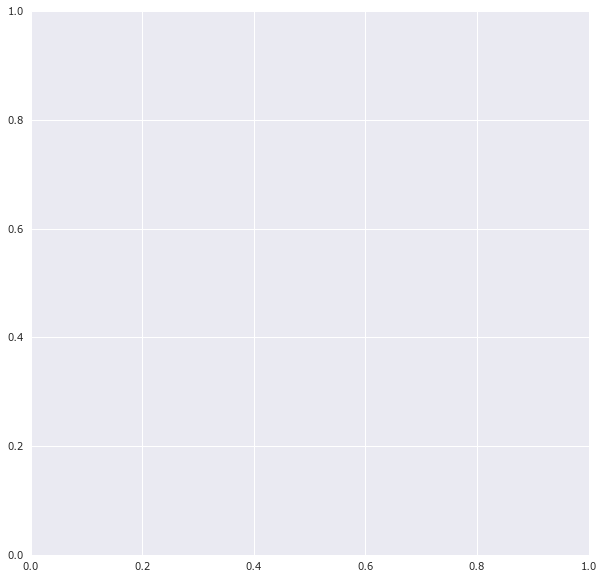

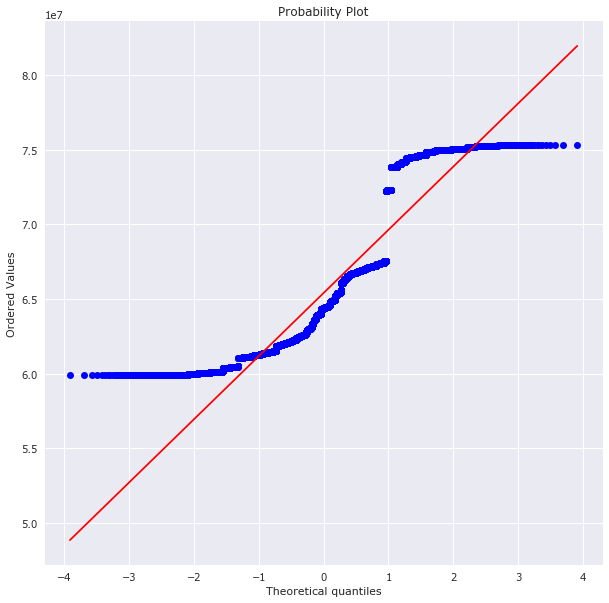


TARGET


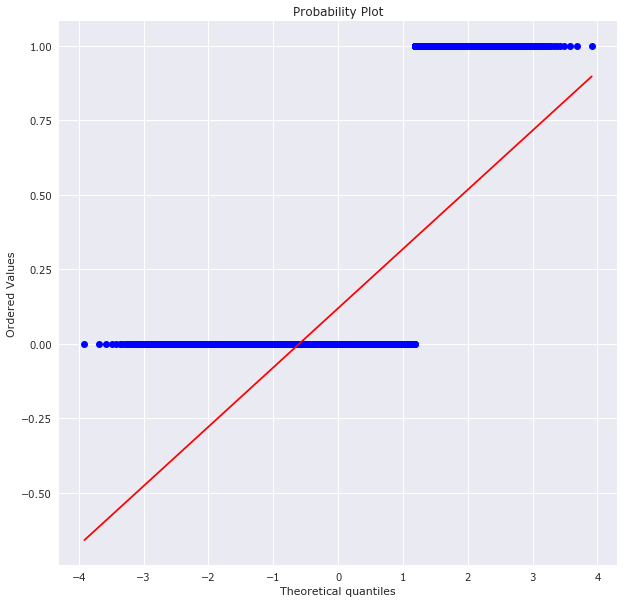


AGE


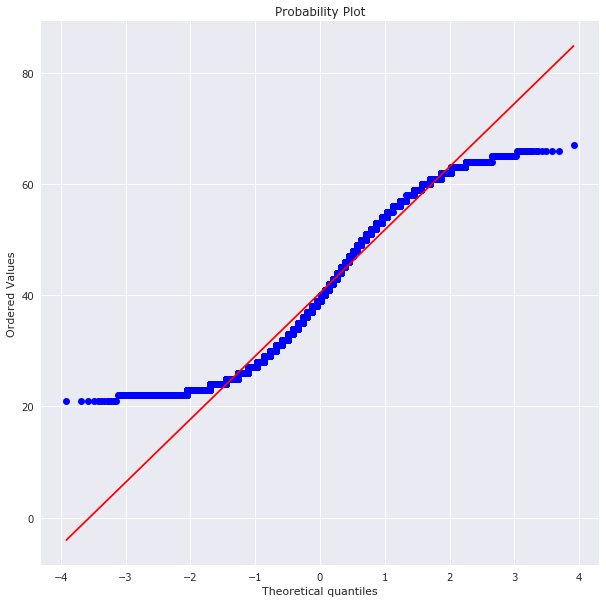


SOCSTATUS_WORK_FL


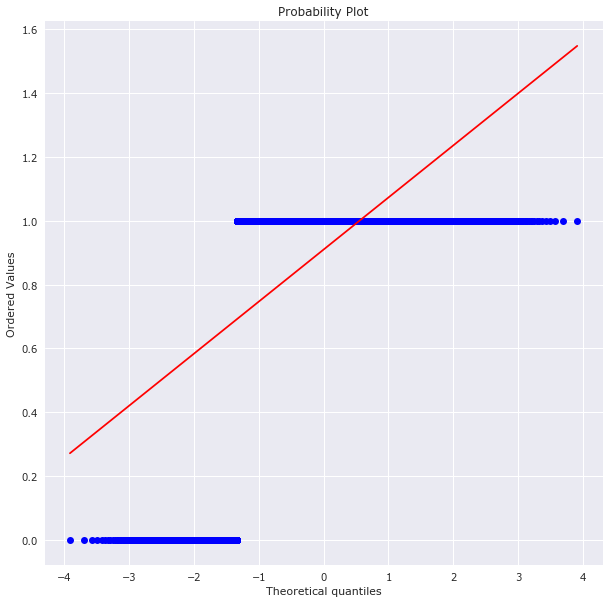


SOCSTATUS_PENS_FL


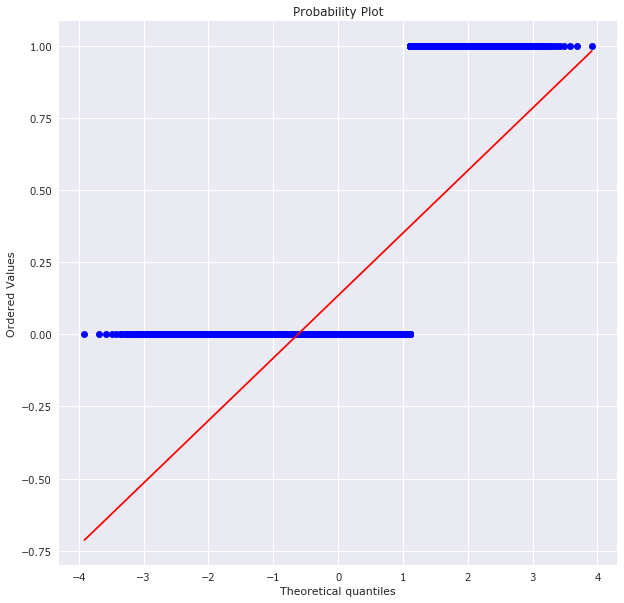


GENDER


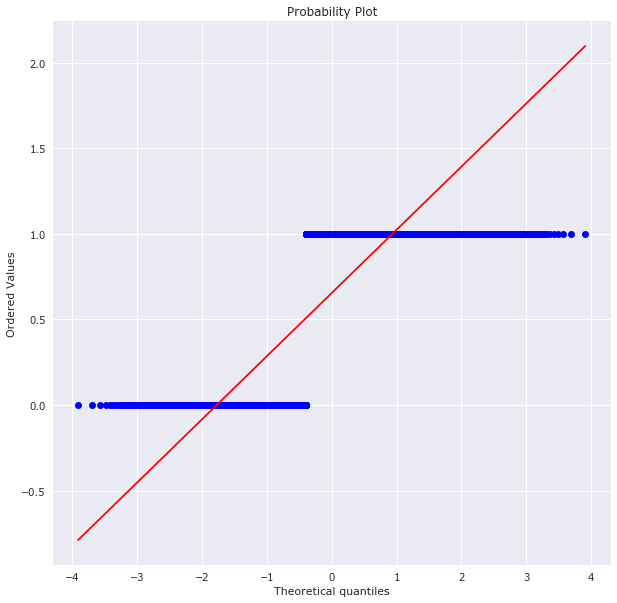


CHILD_TOTAL


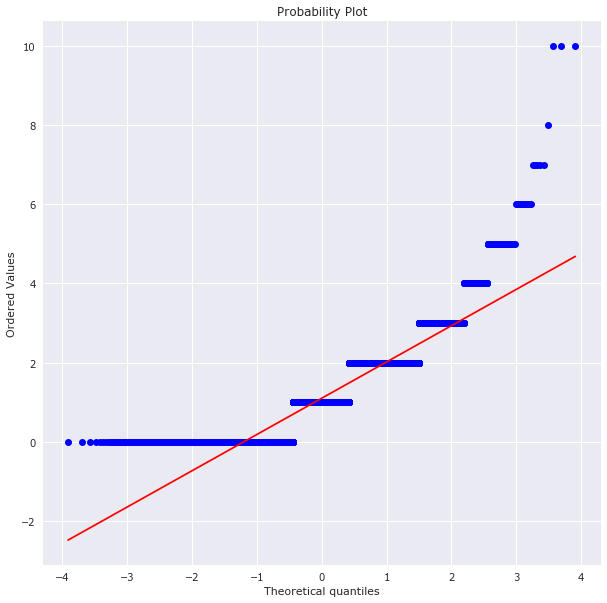


DEPENDANTS


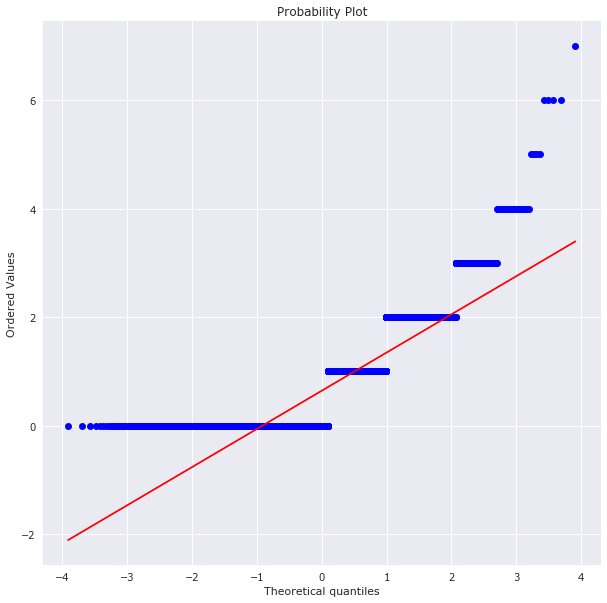


REG_FACT_FL


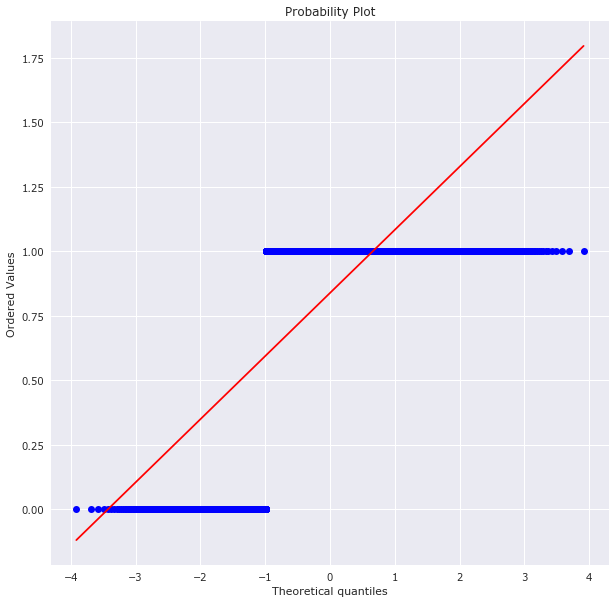


FACT_POST_FL


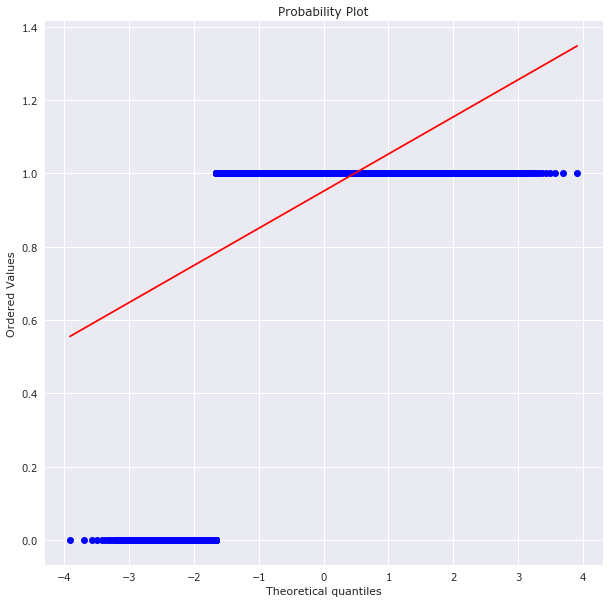


REG_POST_FL


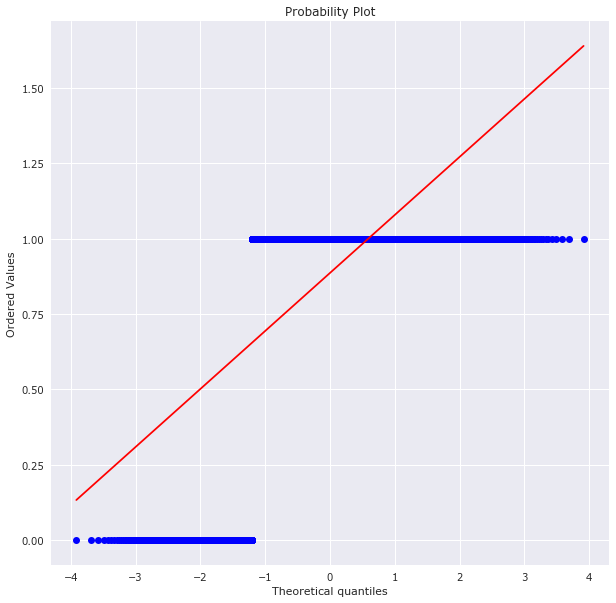


REG_FACT_POST_FL


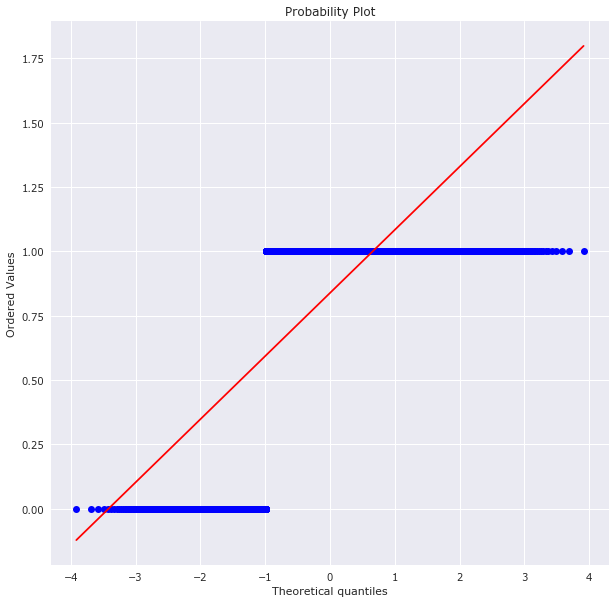


REG_FACT_POST_TP_FL


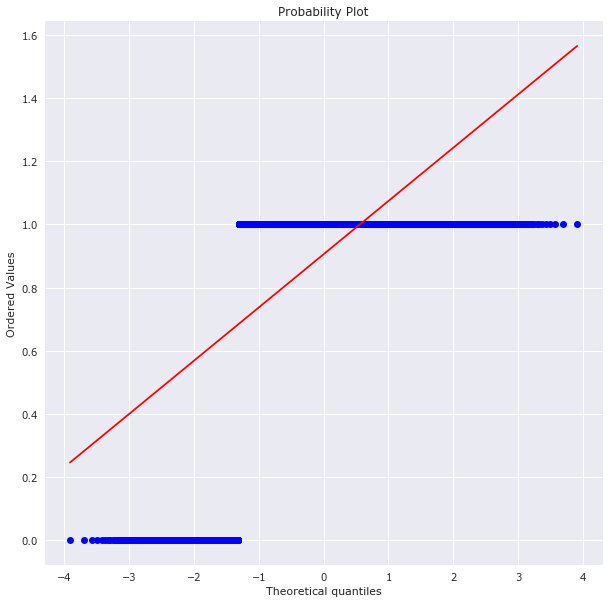


FL_PRESENCE_FL


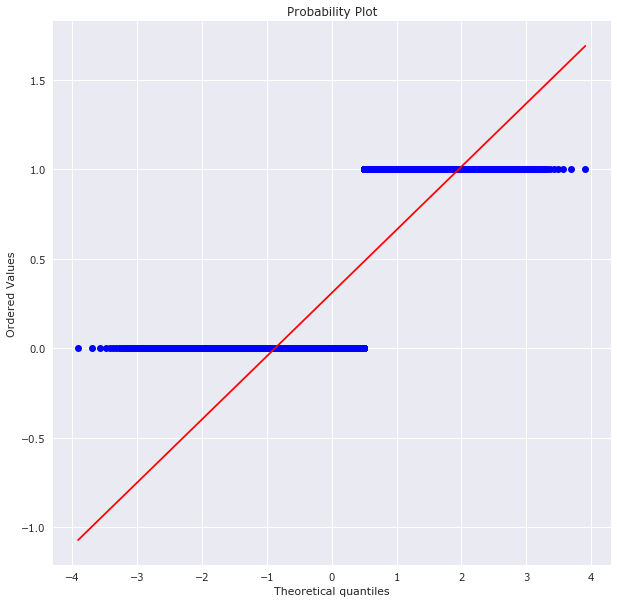


OWN_AUTO


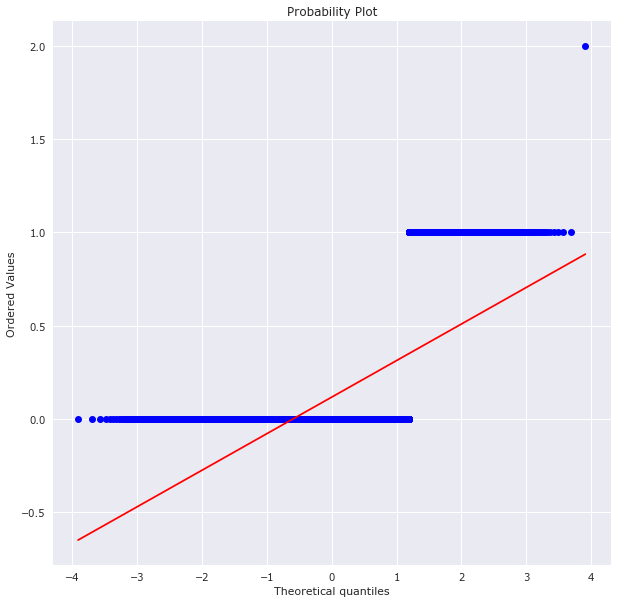


AUTO_RUS_FL


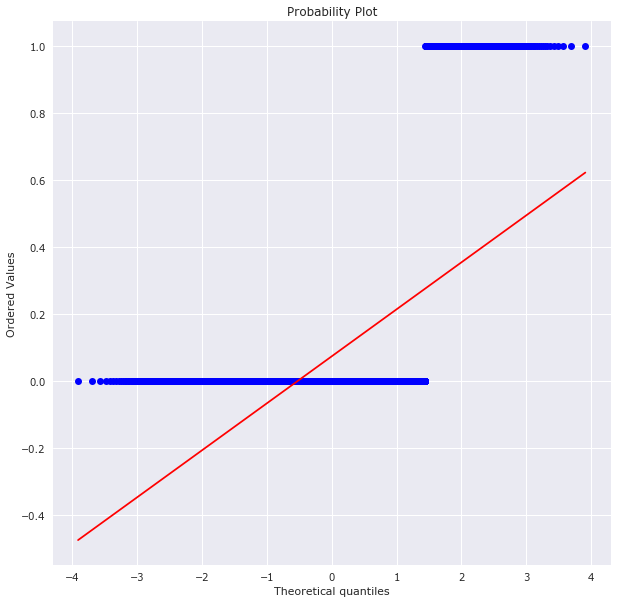


HS_PRESENCE_FL


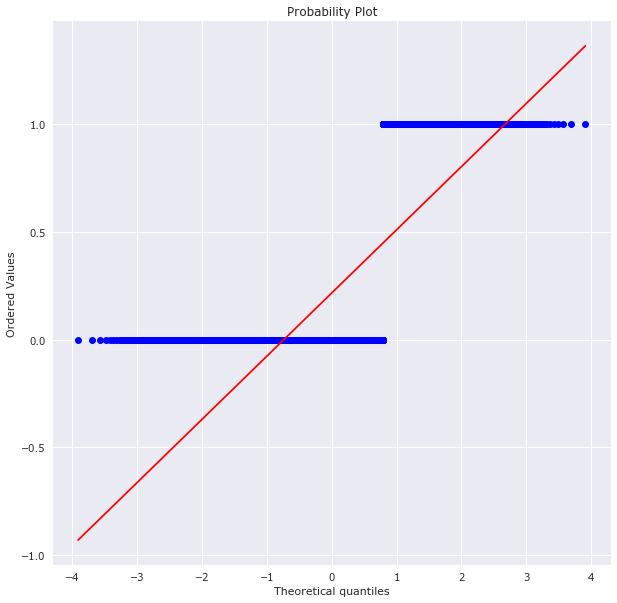


COT_PRESENCE_FL


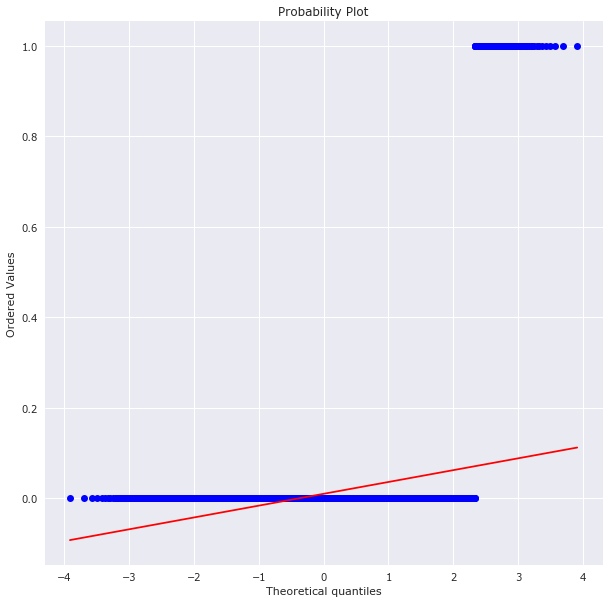


GAR_PRESENCE_FL


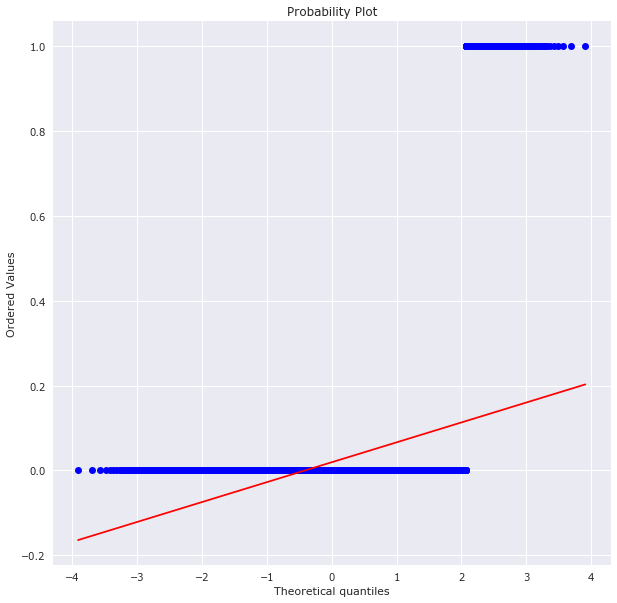


LAND_PRESENCE_FL


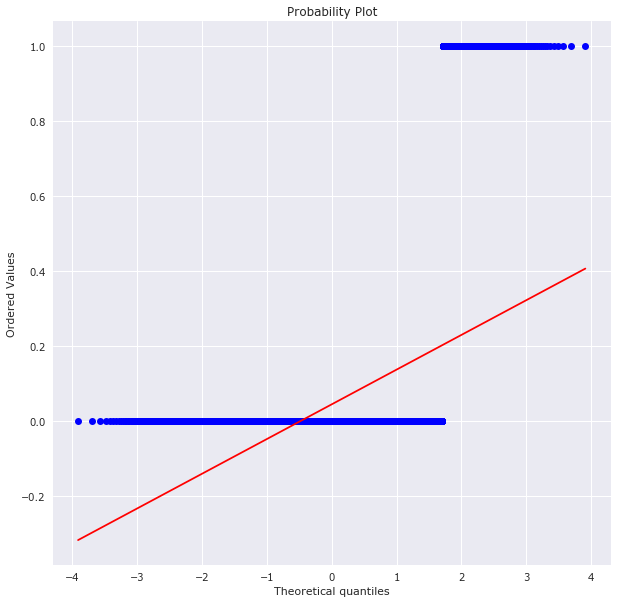


TERM


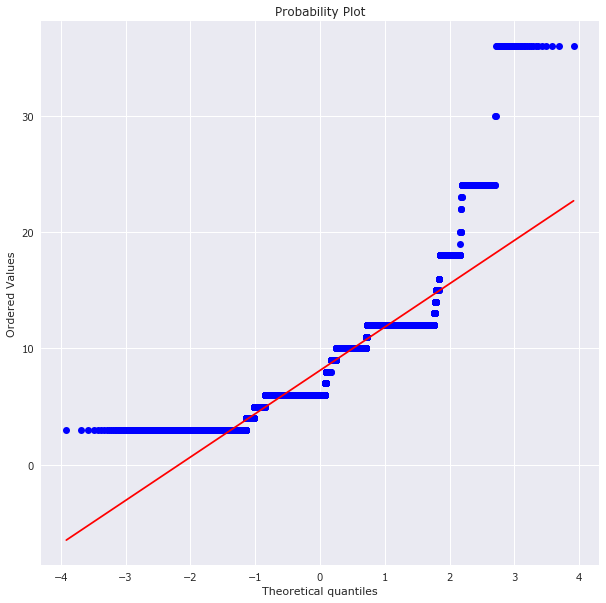


DL_DOCUMENT_FL


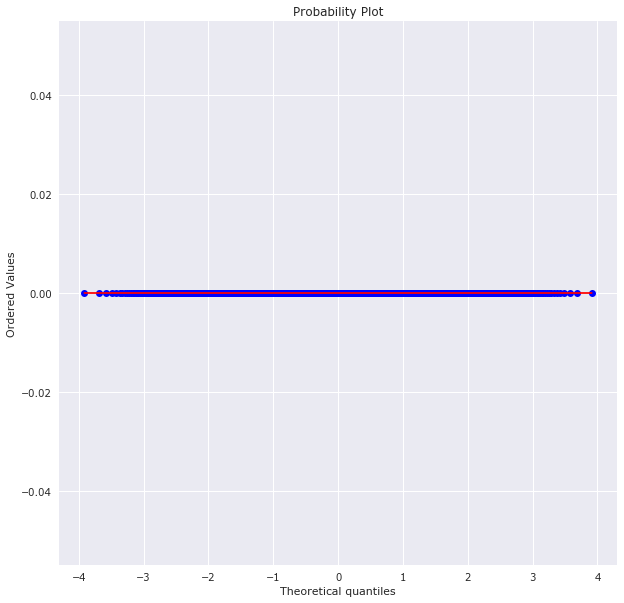


GPF_DOCUMENT_FL


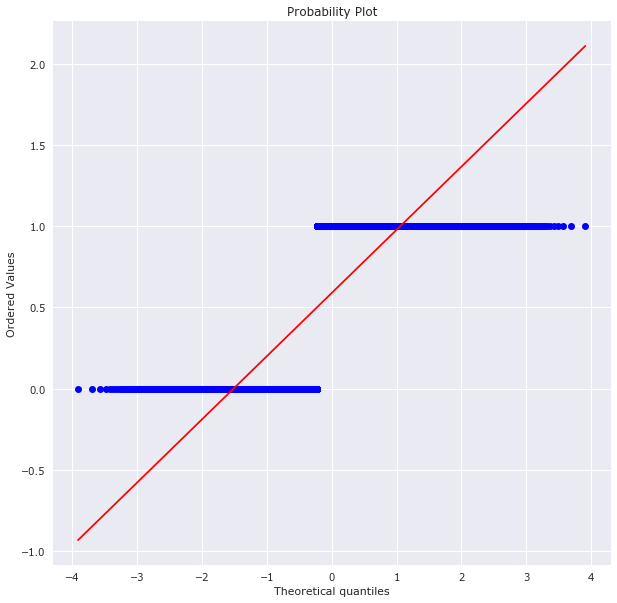


FACT_LIVING_TERM


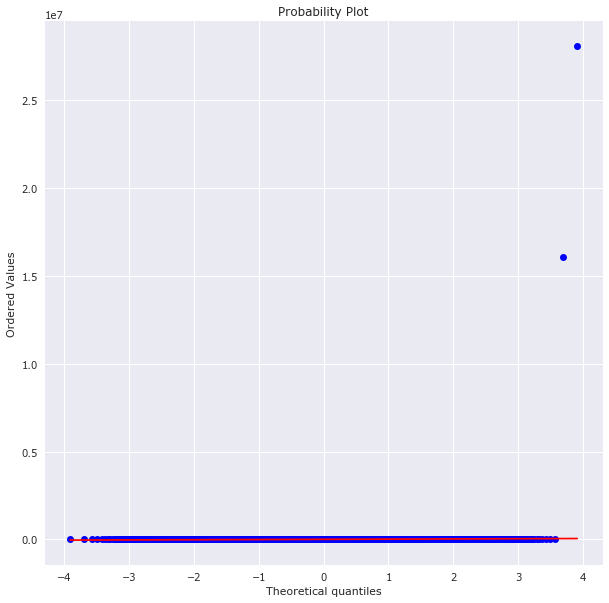


WORK_TIME


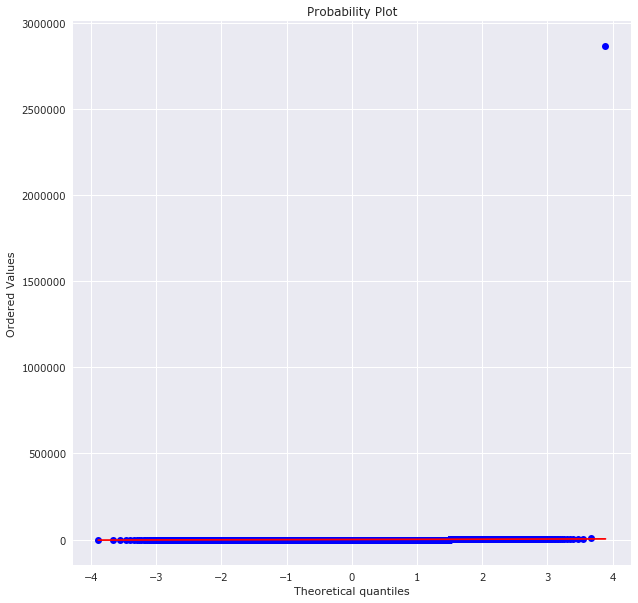


FACT_PHONE_FL


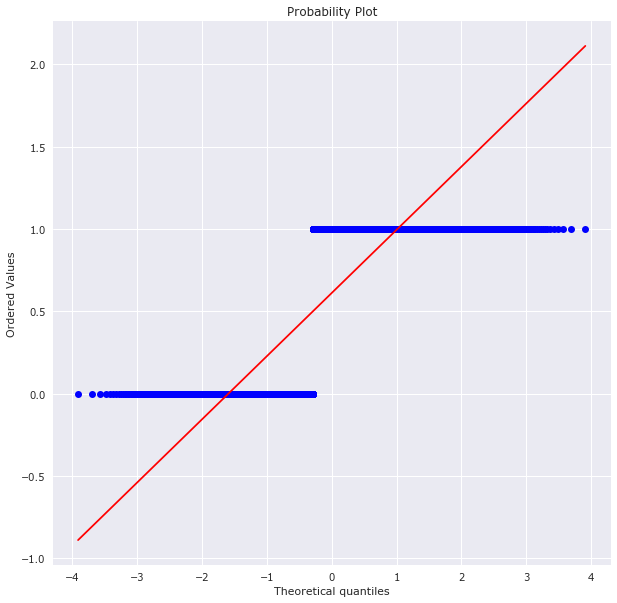


REG_PHONE_FL


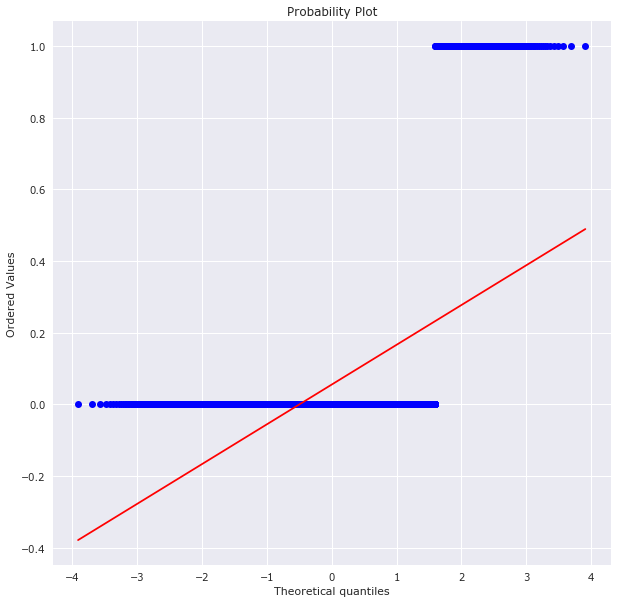


GEN_PHONE_FL


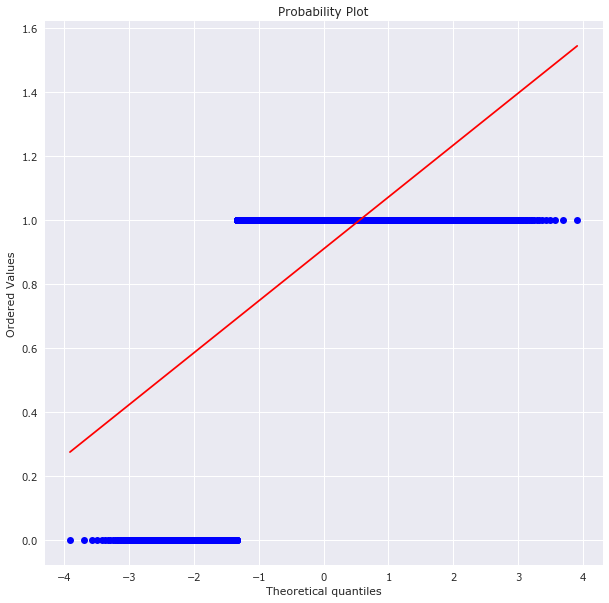


LOAN_NUM_TOTAL


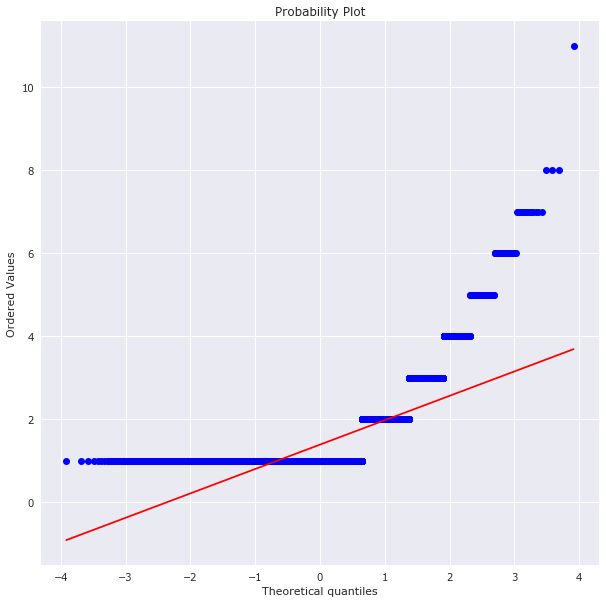


LOAN_NUM_CLOSED


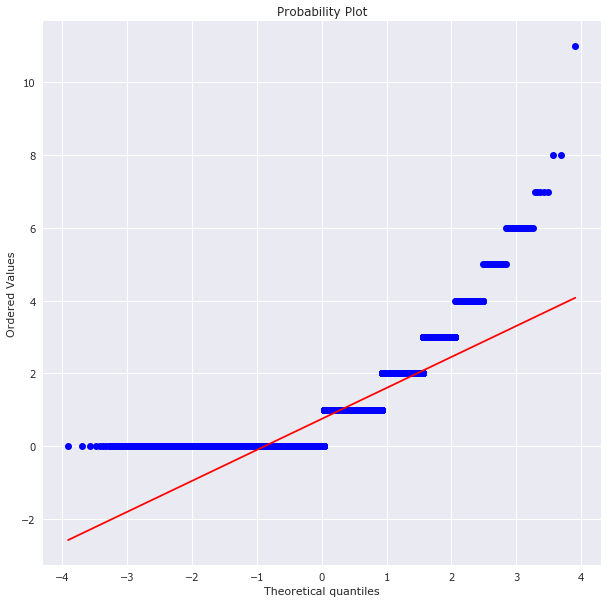


LOAN_NUM_PAYM


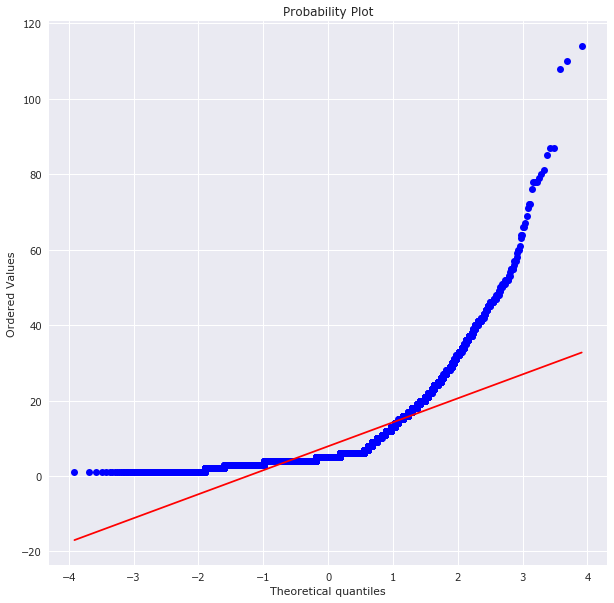


LOAN_DLQ_NUM


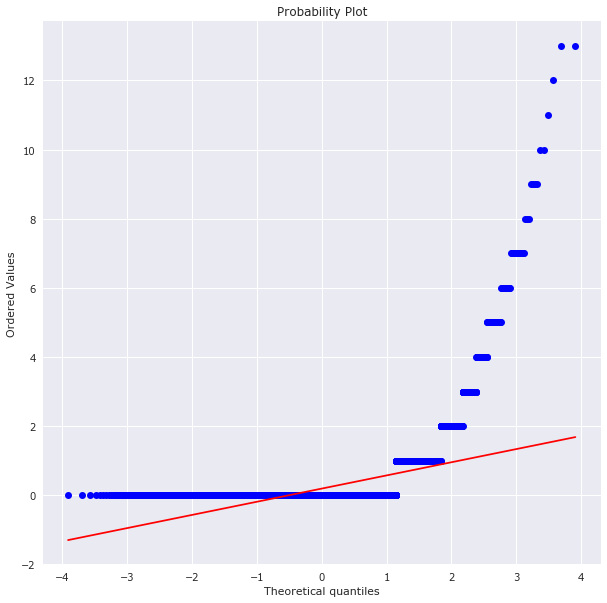


LOAN_MAX_DLQ


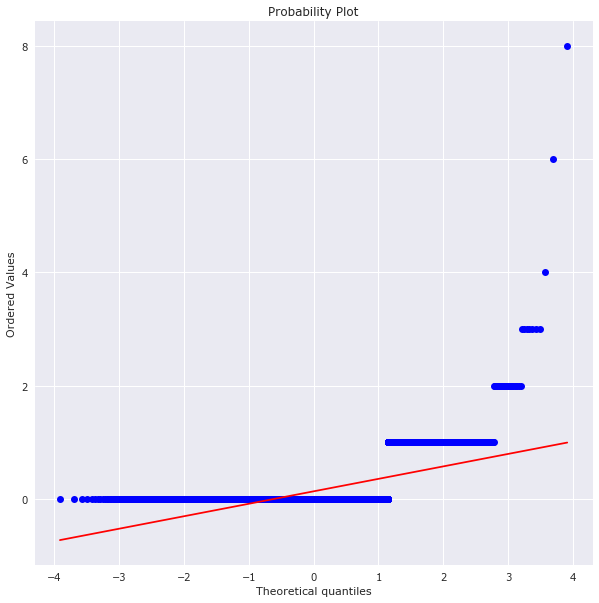


PREVIOUS_CARD_NUM_UTILIZED


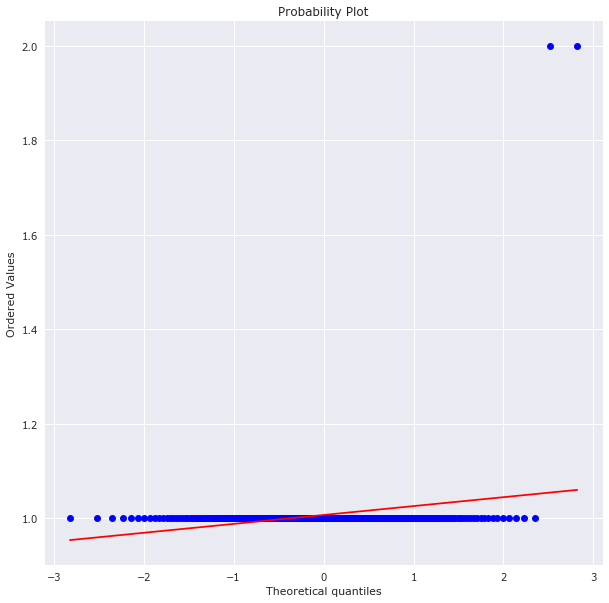

In [187]:
df.show_qq_plot('@all')

In [107]:
df.num_can_be_cat_columns

array(['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
       'CHILD_TOTAL', 'DEPENDANTS', 'REG_FACT_FL', 'FACT_POST_FL',
       'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL',
       'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
       'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL',
       'DL_DOCUMENT_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL',
       'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED',
       'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'PREVIOUS_CARD_NUM_UTILIZED'],
      dtype='<U26')

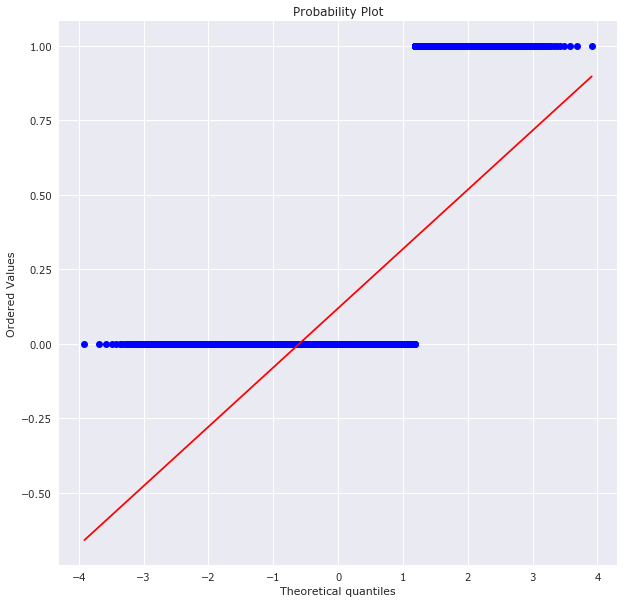

In [109]:
df.show_qq_plot('TARGET', True)